[markdown記法](https://qiita.com/tbpgr/items/989c6badefff69377da7)

[米国データサイエンティストがやさしく教えるデータサイエンスのためのPython講座](https://www.udemy.com/course/ds_for_python/learn/lecture/21511822#overview)

# Matplotlib

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## plt.plot()
- plt.plot(x, y)
- plt.plot('column1', 'column2', data=df)

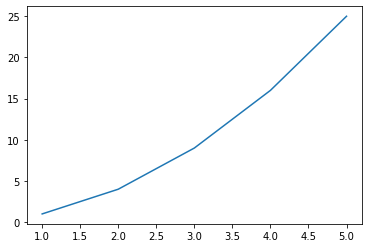

In [6]:
x = [1, 2, 3, 4, 5]
# y = [1, 4, 9, 16, 25]
y = np.array(x) ** 2
plt.plot(x,y)

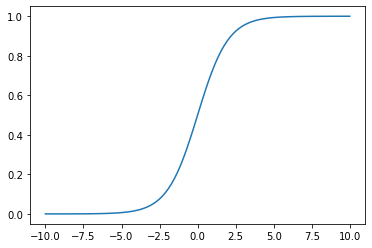

In [15]:
## sigmoid関数　0か1かを表現できる
x = np.linspace(-10, 10, 100)
z = 1 / (1 + np.exp(-x))
plt.plot(x, z)

<ipython-input-19-e1ced58834f9>:3: RuntimeWarning: Second argument 'b' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot('a', 'b', data=df)


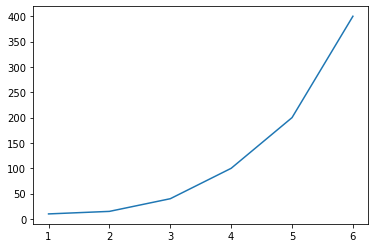

In [19]:
df = pd.DataFrame({'a': [1, 2, 3, 4, 5, 6],
'b': [10, 15, 40, 100, 200, 400]})
plt.plot('a', 'b', data=df)

## 49.Matplotlibのstyle変更

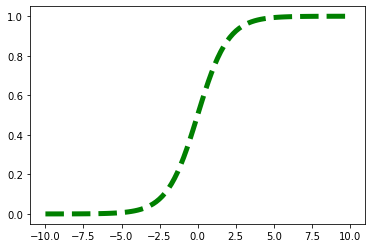

In [22]:
x = np.linspace(-10, 10, 100)
z = 1 / (1 + np.exp(-x))
plt.plot(x, z, 'g--', linewidth=5)

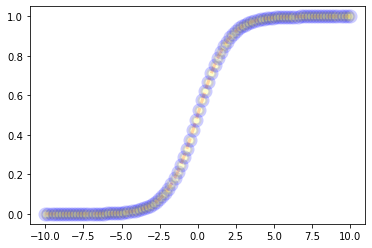

In [29]:
plt.plot(x, z,
        color='red',
        lw=3,
        ls='--',
        marker='o',
        markersize=10,
        markerfacecolor='yellow',
        markeredgecolor='blue',
        markeredgewidth=4,
        alpha=0.2)

### 付属情報をつける

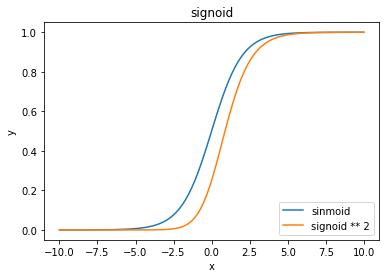

In [62]:
plt.plot(x, z, label='sinmoid')
plt.plot(x, z**2, label='signoid ** 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('signoid')
plt.legend(loc=4)

## 51.複数のplotを描画する
- plt.subplot()
- plt.figure()
- plt.subplots() - これが一番便利

### plt.subplot()

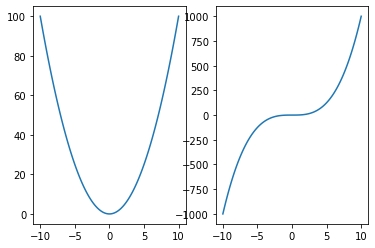

In [44]:
x = np.linspace(-10, 10, 100)
plt.subplot(1, 2, 1)
plt.plot(x, x**2)

plt.subplot(1, 2, 2)
plt.plot(x, x**3)

### plt.figure()
オブジェクト指向

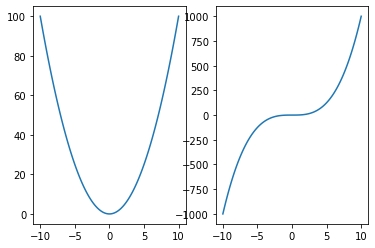

In [47]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(x, x**2)
ax2.plot(x, x**3)

### plt.subplots()
**これが一番便利**

<ipython-input-61-7a3d33e6b0f3>:5: RuntimeWarning: invalid value encountered in log
  axes[1, 1].plot(x, np.log(x))


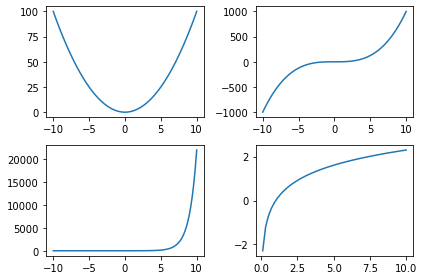

In [61]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(x, x**2)
axes[0, 1].plot(x, x**3)
axes[1, 0].plot(x, np.exp(x))
axes[1, 1].plot(x, np.log(x))
fig.tight_layout()

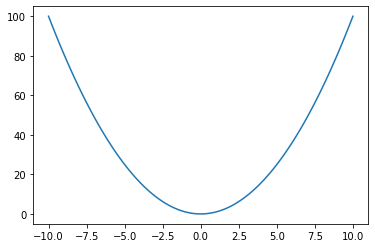

In [64]:
# 1行1列ならこれでOK
fig, axes = plt.subplots()
axes.plot(x, x**2)

(-11.0, 11.0, -1100.0, 1100.0)

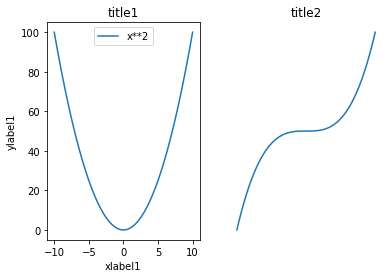

In [67]:
# 
fig, axes = plt.subplots(1, 2)
axes[0].plot(x, x**2, label='x**2')
axes[1].plot(x, x**3)
axes[0].set_xlabel('xlabel1')
axes[0].set_ylabel('ylabel1')
axes[0].set_title('title1')
axes[1].set_title('title2')
axes[0].legend()
axes[1].axis('off')

## 52.散布図
- plt.scatter()

In [4]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')

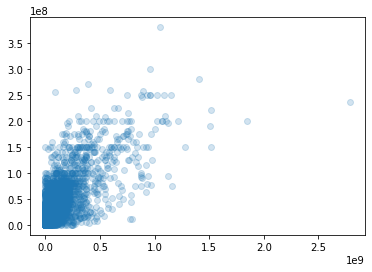

In [6]:
plt.scatter(df['revenue'], df['budget'], alpha=0.2)

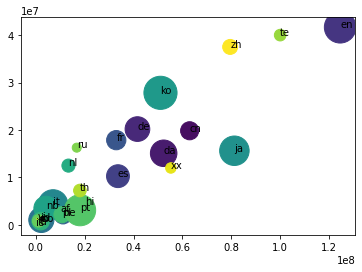

In [32]:
df = df[(df['budget'] != 0) & (df['revenue'] != 0)]
lang_group_df = df.groupby('original_language').mean()[['budget', 'revenue', 'vote_count']]
c = np.arange(len(lang_group_df))
plt.scatter('revenue', 'budget', data=lang_group_df, s='vote_count', c=c)
# dataframeは .iterrows() でforで回せるようになる
for idx, row in lang_group_df.iterrows():
    plt.annotate(idx, (row['revenue'], row['budget']))

In [31]:
for idx, row in lang_group_df.iterrows():
    x = row['revenue']
    y = row['budget']
    print(idx, x, y)


af 9879971.0 3000000.0
cn 62960727.8 19843390.6
da 52323054.0 15100000.0
de 41595543.222222224 20198861.111111112
en 124545062.57736944 41661204.263700835
es 33627368.86666667 10275057.8
fa 900000.0 180000.0
fr 32924654.84 17865338.04
he 11125849.0 2000000.0
hi 20106630.42857143 4400000.0
id 2274881.0 1050000.0
is 11.0 10.0
it 7068818.5 4300005.0
ja 81266357.61538461 15630592.23076923
ko 51023522.6 27840000.0
nb 4159678.0 3500000.0
nl 13361558.0 12500000.0
no 1984662.0 800000.0
pl 10700000.0 2159280.0
pt 18119239.0 3100000.0
ro 1185783.0 852510.0
ru 16762171.333333334 16283333.333333334
te 100000000.0 40000000.0
th 18051122.0 7250000.0
vi 639000.0 1300000.0
xx 55260558.0 12000000.0
zh 79536962.15384616 37514692.307692304


## 53.ヒストグラムと棒グラフ
- plt.hist()
- plt.bar()

### ヒストグラム

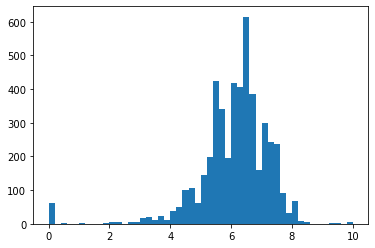

In [36]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
plt.hist(df['vote_average'], bins=50)
plt.show()

profitのヒストグラムを描いてみよう

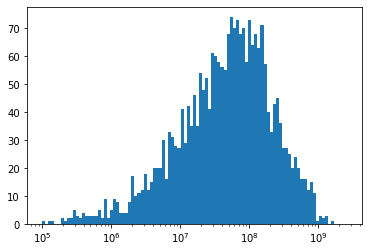

In [59]:
fig, axes = plt.subplots()

# budget=0 と revenue=0　を除く
df = df[(df['budget'] != 0) & (df['revenue'] != 0)]

# profit を計算する
df['profit'] = df.apply(lambda x: x['revenue'] - x['budget'], axis=1)

#logscale
logbins = np.logspace(5, np.log10(df['profit'].max()), 100)
axes.hist(df['profit'], bins=logbins)
axes.set_xscale('log')

### 棒グラフ

In [62]:
df = pd.DataFrame({'categorical': ['A', 'B', 'C'], 'val':[10, 30, 20]})
df

,categorical,val
0,A,10
1,B,30
2,C,20


<BarContainer object of 3 artists>

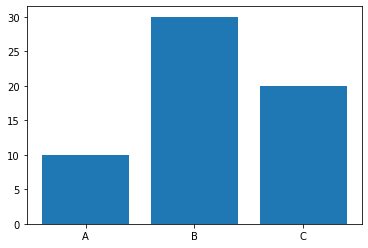

In [64]:
plt.bar('categorical', 'val', data=df)

<AxesSubplot:xlabel='categorical'>

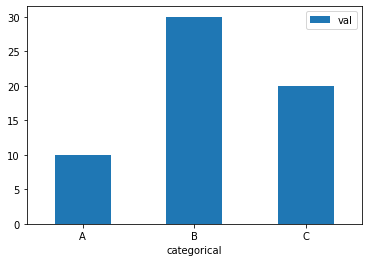

In [66]:
df.plot('categorical', 'val', kind='bar', rot=0)

<AxesSubplot:>

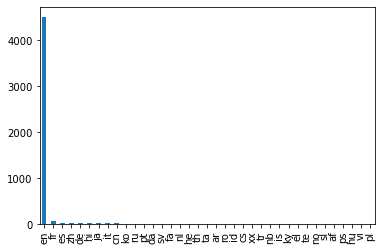

In [70]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
df['original_language'].value_counts().plot(kind='bar')

## 54.箱ひげ図
- boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f97d4c91eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f97d45ae5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f97d4c91b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f97d45aec70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f97d45aefd0>],
 'means': []}

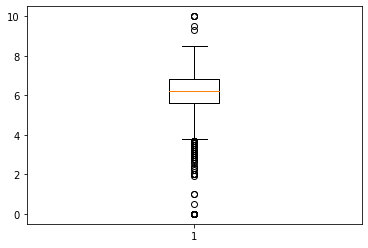

In [71]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
plt.boxplot(df['vote_average'])

## 55.plotを保存する
- サイズを指定してplotする
  - plt.figure(figsize=(,))
- pngファイルで保存
  - .savefig()
- PDFファイルで保存

### サイズを指定してplotする

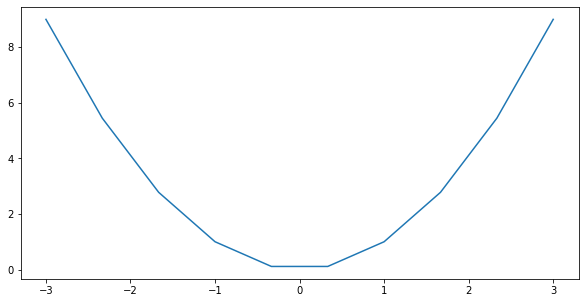

In [76]:
x = np.linspace(-3, 3, 10)

plt.figure(figsize=(10, 5))
plt.plot(x, x**2)

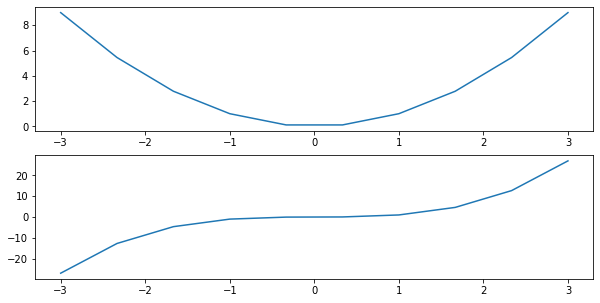

In [85]:
fig, axes = plt.subplots(2, 1, figsize=(10,5))
axes[0].plot(x, x**2)
axes[1].plot(x, x**3)

### pngファイルで保存: .savefig()

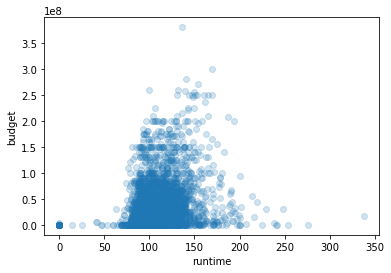

In [92]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
plt.scatter('runtime', 'budget', data=df, alpha=0.2)
plt.xlabel('runtime')
plt.ylabel('budget')
plt.savefig('runtime_budget_scatter.png')

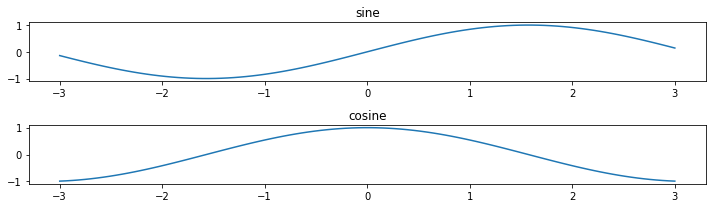

In [100]:
fig, axes = plt.subplots(2, 1, figsize=(10, 3))
x=np.linspace(-3, 3, 100)
axes[0].set_title('sine')
axes[1].set_title('cosine')
axes[0].plot(x, np.sin(x))
axes[1].plot(x, np.cos(x))
fig.tight_layout()
fig.savefig('cos_sin.png')

### PDFで保存: 

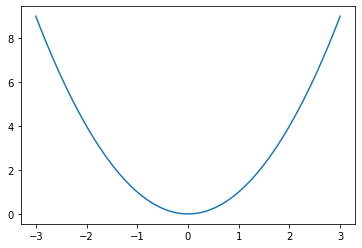

In [105]:
from matplotlib.backends.backend_pdf import PdfPages

pdf = PdfPages('pdf_files.pdf')

fig, axes = plt.subplots()
axes.plot(x, x**2)
pdf.savefig(fig)
pdf.close()